In [1]:
import numpy as np
import pandas as pd
import MeCab
import re
import networkx as nx
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
data1=pd.read_excel("data/se/preprocessing_2015_cafe_ssal.xlsx")
data2=pd.read_excel("data/se/naver_cafe_ssal_contents_2019_전처리완.xlsx")
data3=pd.read_excel("data/se/2020cafere.xlsx")

In [3]:
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9653 non-null   int64 
 1   title       9653 non-null   object
 2   nickname    9653 non-null   object
 3   date        9653 non-null   object
 4   content     9607 non-null   object
 5   comments    8912 non-null   object
dtypes: int64(1), object(5)
memory usage: 452.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 6 columns):


In [4]:
d1=pd.concat([data1,data2])
d1=d1[["date","content"]]
d1

,date,content
0,2015.01.27,세종시로 올해 1월 10일 이사했습니다.어제 쌀이 똑 떨어졌는데 마침 까페에 쌀공구...
1,2015.01.04,저희 큰아버지께서 쌀도매를 하세요^^빨간쌀 이예요.저도 작녁부터 계속 먹고있는데요^...
2,2015.01.13,제가 변비가 심해서 현미쌀100%를
3,2015.01.12,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요 아기간식도 요즘 고민...
4,2015.01.11,심심한 일요일 오후.당근쌀머핀 만들어 보았어요~당근이랑 우유는 휘리릭 갈아주고밀가루...
...,...,...
9549,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
9550,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
9551,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
9552,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [5]:
d2=data3[["date","content"]]
d2

,date,content
0,2020.07.06,"#RICEBAKING#쌀구움과자→←장여진, 채미희 지음경향미디어메마른 쌀베이킹계의단..."
1,2020.07.28,먹던게있어서 식탁밑에 보관만하다가 개봉햇더니만ᆢ쌀이 눈에 보이게 딱 구분되어있는거 ...
2,2020.07.22,어제 쌀이 똑 떨어져서 ...한인마트 가기는 너무 멀고 동네 수퍼 스토어...
3,2020.07.22,가와지쌀 쌕깔이 원래 이렇개누리끼리한가요?살짝 푸루딩긴힌것같기도하고.. 쌀냄새도 쫌...
4,2020.07.30,해원고 쌀꾸러미 한두달전에 받은듯해요얼마전 남은 쌀다먹고 5키로짜리 쌀 맛나게 잘먹...
...,...,...
10045,2020.08.07.,친정에서 지난주에 쌀을가져왔는데 \n저희먹을거빼고 10키로짜리 2만원에판매합니다\n...
10046,2020.08.20.,세상에 오대쌀 산지 이주된거같은데..ㅠ\n지퍼백보관했고요\n10키로 반반해서 하나는...
10047,2020.08.16.,인터넷검색하니\n\n20배라해서\n\n쌀가루 20그람에 물400넣고 이유식 돌리니ㅠ...
10048,2020.08.18.,"일반쌀 20kg, 찹쌀 20kg 미개봉 상태인데 좀 오래되어서 가축 사료용으로 쓰..."


In [6]:
d3=pd.concat([d1,d2])
d3

,date,content
0,2015.01.27,세종시로 올해 1월 10일 이사했습니다.어제 쌀이 똑 떨어졌는데 마침 까페에 쌀공구...
1,2015.01.04,저희 큰아버지께서 쌀도매를 하세요^^빨간쌀 이예요.저도 작녁부터 계속 먹고있는데요^...
2,2015.01.13,제가 변비가 심해서 현미쌀100%를
3,2015.01.12,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요 아기간식도 요즘 고민...
4,2015.01.11,심심한 일요일 오후.당근쌀머핀 만들어 보았어요~당근이랑 우유는 휘리릭 갈아주고밀가루...
...,...,...
10045,2020.08.07.,친정에서 지난주에 쌀을가져왔는데 \n저희먹을거빼고 10키로짜리 2만원에판매합니다\n...
10046,2020.08.20.,세상에 오대쌀 산지 이주된거같은데..ㅠ\n지퍼백보관했고요\n10키로 반반해서 하나는...
10047,2020.08.16.,인터넷검색하니\n\n20배라해서\n\n쌀가루 20그람에 물400넣고 이유식 돌리니ㅠ...
10048,2020.08.18.,"일반쌀 20kg, 찹쌀 20kg 미개봉 상태인데 좀 오래되어서 가축 사료용으로 쓰..."


In [7]:
data=d3.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29179 entries, 0 to 29178
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    29179 non-null  int64 
 1   date     29179 non-null  object
 2   content  29179 non-null  object
dtypes: int64(1), object(2)
memory usage: 684.0+ KB


## 키워드 문장 뽑기

In [8]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
data2 = data.copy()

In [17]:
for i in range(len(data2)):
    data2["content"][i]=str(data2["content"][i]).replace('네요','네요||-||').replace('하죠','하죠||-||').replace('데요','데요||-||').replace('이네요','이네요||-||').replace('네요.','네요||-||').replace('되죠','되죠||-||').replace('대요','대요||-||').replace('이요','이요||-||').replace('돼요.','돼요||-||').replace('되요','되요||-||').replace('다닙니다','다닙니다||-||').replace('입니다','입니다||-||').replace('입니다.','입니다||-||').replace('니다','니다||-||').replace('중입니다','중입니다||-||').replace('입니다','입니다||-||').replace('나요.','나요||-||').replace('어요','어요||-||').replace('까요','까요||-||').replace('에요','에요||-||').replace('이에요','이에요||-||').replace('봐요','봐요||-||').replace('아요.','아요||-||').replace('해요','해요||-||').replace('려요','려요||-||').replace('구요','구요||-||').replace('고요','고요||-||').replace('죠','죠||-||').replace(':)','').replace('더라','더라||-||').replace('게요','게요||-||').replace('께요','께요||-||').replace('세요','세요||-||').replace('든요','든요||-||').replace('예요','예요||-||').replace('서요','서요||-||').replace('않았다','않았다||-||').replace('었다','었다||-||').replace('있다','있다||-||').replace('이다','이다||-||').replace('싶다','싶다||-||').replace('않다','않다||-||').replace('되었다','되었다||-||').replace('아니다','아니다||-||').replace('하자','하자||-||').replace('는다','는다||-||').replace('했다','했다||-||').replace('한다','한다||-||').replace('혔다','혔다||-||').replace('난다','난다||-||')

In [18]:
for i in range(len(data2)):
    data2["content"][i]=str(data2["content"][i]).replace('.','').replace('?','').replace('~','').replace('!','').replace('^','').replace('#','').replace('★','').replace('ㅋ','').replace('ㅜ','').replace('ㅠ','').replace('ㅎ','').replace('ㅏ','').replace('ㅡ','')

In [52]:
data2

,index,date,content
0,0,2015.01.27,세종시로 올해 1월 10일 이사했습니다||-||어제 쌀이 똑 떨어졌는데 마침 까페에...
1,1,2015.01.04,저희 큰아버지께서 쌀도매를 하세요||-||빨간쌀 이예요||-||저도 작녁부터 계속 ...
2,2,2015.01.13,제가 변비가 심해서 현미쌀100%를
3,3,2015.01.12,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요||-|| 아기간식도 ...
4,4,2015.01.11,심심한 일요일 오후당근쌀머핀 만들어 보았어요||-||당근이랑 우유는 휘리릭 갈아주고...
...,...,...,...
29174,10045,2020.08.07.,친정에서 지난주에 쌀을가져왔는데 \n저희먹을거빼고 10키로짜리 2만원에판매합니다||...
29175,10046,2020.08.20.,세상에 오대쌀 산지 이주된거같은데\n지퍼백보관했고요||-||\n10키로 반반해서 하...
29176,10047,2020.08.16.,인터넷검색하니\n\n20배라해서\n\n쌀가루 20그람에 물400넣고 이유식 돌리니\...
29177,10048,2020.08.18.,"일반쌀 20kg, 찹쌀 20kg 미개봉 상태인데 좀 오래되어서 가축 사료용으로 쓰..."


In [53]:
conlist=[]
for i in range(len(data2)):

    a=[]
    a.append(data2["content"][i].split("||-||"))
    
    d=pd.DataFrame(a).T
    d=d[d[0]!=""].reset_index()
    d=d[d[0]!="구요"].reset_index()
    conca1=d[d[0].str.contains("빵|케이크|케익|쿠키|머핀|카스테라|식빵|다쿠아즈|마카롱|버터|초코|크림|오븐|생크림|앙금|반죽|설탕|박력분",na=False)]
    conidex=conca1.index
    list(conidex)


    for i in list(conidex):
        conlist.append(str(d[0][i]))
        #try:
            #conlist.append(+str(d[0][i]))
        #except:
            #pass

In [54]:
aaaa=pd.DataFrame(conlist)
aaaa

,0
0,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요
1,아기간식도 요즘 고민하고 있던 차에 백프로 쌀로 만든 찐빵이니 이거다 싶었어요
2,쌀찐빵을 구워봐야겠다 생각했어요
3,그랫더니 찜기와 후라이팬에서의 두가지가 고루 섞인 더 맛있는 찐빵이 되었어요
4,겉은 바삭하고 속은 포근 촉촉넘넘 맛나요 올겨울 착한마을 쌀찐빵과 함께
...,...
9334,없어가\n\n오늘은 맨빵만 먹어요
9335,"이번 주, 방앗간 휴가에, 택배 배송 휴가로 난감했는데\n월요일 중요한 백일떡+케이..."
9336,제주 쑥으로 쌀로만든 \n\n쑥파시통통쌀식빵 저희 부모님께 드리고 싶어\n\n레시...
9337,쌀식빵 매번실패해서\n반죽기사고싶어져요\n반죽이잘안되서 잘안부풀어서 그런걸까요


In [55]:
for i in range(len(aaaa)):
    aaaa[0][i]=aaaa[0][i].lstrip()
    aaaa[0][i]=aaaa[0][i].rstrip()

In [56]:
qw=aaaa.drop_duplicates([0],keep = 'first')
qw.to_excel("cafe_bk.xlsx")
qw

,0
0,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요
1,아기간식도 요즘 고민하고 있던 차에 백프로 쌀로 만든 찐빵이니 이거다 싶었어요
2,쌀찐빵을 구워봐야겠다 생각했어요
3,그랫더니 찜기와 후라이팬에서의 두가지가 고루 섞인 더 맛있는 찐빵이 되었어요
4,겉은 바삭하고 속은 포근 촉촉넘넘 맛나요 올겨울 착한마을 쌀찐빵과 함께
...,...
9334,없어가\n\n오늘은 맨빵만 먹어요
9335,"이번 주, 방앗간 휴가에, 택배 배송 휴가로 난감했는데\n월요일 중요한 백일떡+케이..."
9336,제주 쑥으로 쌀로만든 \n\n쑥파시통통쌀식빵 저희 부모님께 드리고 싶어\n\n레시...
9337,쌀식빵 매번실패해서\n반죽기사고싶어져요\n반죽이잘안되서 잘안부풀어서 그런걸까요


In [57]:
data = pd.read_excel('cafe_bk.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9221 entries, 0 to 9220
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9221 non-null   int64 
 1   content     9216 non-null   object
dtypes: int64(1), object(1)
memory usage: 144.2+ KB


In [58]:
data=data.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       9216 non-null   int64 
 1   Unnamed: 0  9216 non-null   int64 
 2   content     9216 non-null   object
dtypes: int64(2), object(1)
memory usage: 216.1+ KB


In [59]:
del data['Unnamed: 0']

## 형태소 분석

In [60]:
stopwords = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', '말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용', '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생', '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥', '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥']

In [93]:
def getNVM_lemma(x):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(x)
    #print(parsed)
    word_tag = [w for w in parsed.split("\n")] 
    pos = []
    tags = ["NNG", "NNP","VV","VA","VCP",'VCN','XR']
   
    for word_ in word_tag[:-2]:
        word = word_.split('\t') #['아버지', 'NNG,*,F,아버지,*,*,*,*']
        tag = word[1].split(",")  #['EC', '*', 'F', '는다', '*', '*', '*', '*']
        if('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
            if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                if t not in stopwords:
                    pos.append(t)
        elif ((tag[0] in tags) and (word[0] not in stopwords)):
            pos.append(word[0])
    return pos

In [94]:
data['words'] = data['content'].apply(lambda x: getNVM_lemma(x))
print(data.shape)
data.head()

(9216, 3)


,index,content,words
0,0,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요,"[동안, 공구, 후기, 공구, 게시판, 보, 찐빵]"
1,1,아기간식도 요즘 고민하고 있던 차에 백프로 쌀로 만든 찐빵이니 이거다 싶었어요,"[아기, 간식, 고민, 차, 만들, 찐빵]"
2,2,쌀찐빵을 구워봐야겠다 생각했어요,"[찐빵, 굽, 보]"
3,3,그랫더니 찜기와 후라이팬에서의 두가지가 고루 섞인 더 맛있는 찐빵이 되었어요,"[랫, 더니, 찜, 후라이팬, 섞이, 맛있, 찐빵, 되]"
4,4,겉은 바삭하고 속은 포근 촉촉넘넘 맛나요 올겨울 착한마을 쌀찐빵과 함께,"[겉, 하, 속, 포근, 맛나, 올겨울, 착하, 찐빵]"


In [95]:
# 트랜잭션 데이터를 추출합니다.
transactions = data['words'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.

In [96]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [97]:
ex_list

['동안',
 '공구',
 '후기',
 '공구',
 '게시판',
 '보',
 '찐빵',
 '아기',
 '간식',
 '고민',
 '차',
 '만들',
 '찐빵',
 '찐빵',
 '굽',
 '보',
 '랫',
 '더니',
 '찜',
 '후라이팬',
 '섞이',
 '맛있',
 '찐빵',
 '되',
 '겉',
 '하',
 '속',
 '포근',
 '맛나',
 '올겨울',
 '착하',
 '찐빵',
 '심심',
 '일요일',
 '오후',
 '당근',
 '머핀',
 '만들',
 '당근',
 '우유',
 '휘리',
 '릭',
 '갈아주',
 '밀가루',
 '대신',
 '쌀가루',
 '버터',
 '넣',
 '부푸',
 '가루',
 '베이킹파우더',
 '넣',
 '토핑',
 '땅콩',
 '태랑',
 '감',
 '랭',
 '뽕',
 '하',
 '부풀',
 '빠지',
 '맛',
 '있',
 '하',
 '간단',
 '레시피',
 '머핀',
 '분량',
 '재료',
 '쌀가루',
 '유기',
 '원당',
 '설탕',
 '가능',
 '버터',
 '계란',
 '베이킹파우더',
 '생략',
 '소금',
 '두',
 '집',
 '당근',
 '우유',
 '견과',
 '건포도',
 '감',
 '말랭이',
 '조각',
 '녹이',
 '버터',
 '원당',
 '넣',
 '크림',
 '버무리',
 '계란',
 '미지근',
 '넣',
 '휘리',
 '릭',
 '우유',
 '미지근',
 '갈',
 '넣',
 '휘리',
 '릭',
 '쌀가루',
 '소금',
 '감',
 '말랭이',
 '조각',
 '넣',
 '버무리',
 '머핀',
 '틀',
 '붓',
 '베이킹파우더',
 '넣',
 '머핀',
 '틀',
 '도로',
 '예열',
 '오븐',
 '돌려주',
 '공구',
 '놓치',
 '인터넷',
 '막',
 '뒤지',
 '프로',
 '찐빵',
 '없',
 '찐빵',
 '크기',
 '어른',
 '둥글',
 '부분',
 '크기',
 '팥',
 '호빵',
 '속',
 '팥',
 '차원',
 '다르',
 '집',
 

In [98]:
# 데이터 정제
for ex in ex_list:
    if ex in ex_list:
      ex_list.remove(ex)

    if ex =='아가' :
      ex_list.remove(ex)
      ex_list.append('아이')
    
    if ex =='아기':
      ex_list.remove(ex)
      ex_list.append('아이')

    if ex =='애기':
      ex_list.remove(ex)
      ex_list.append('아이')

    if ex == '베이':
      ex_list.remove(ex)
      ex_list.append('베이킹')
    
    if ex == '쌀벌레':
      ex_list.remove(ex)
      ex_list.append('벌레')

    if ex == '벌래':
      ex_list.remove(ex)
      ex_list.append('벌레')

    if ex == '쌀벌래':
      ex_list.remove(ex)
      ex_list.append('벌레')

    if ex == '배송':
      ex_list.remove(ex)
      ex_list.append('배달')
      
    if ex == '기한':
      ex_list.remove(ex)
      ex_list.append('유통기한')

    if ex == '박력':
      ex_list.remove(ex)
      ex_list.append('박력분')


In [99]:
count = Counter(ex_list)
count

Counter({'포근': 1,
         '올겨울': 1,
         '뽕': 3,
         '차원': 1,
         '연하': 2,
         '검정콩': 1,
         '울이': 1,
         '모루': 1,
         '나트륨': 2,
         '분손': 1,
         '방목유': 1,
         '깊이': 2,
         '려고': 3,
         '돌체': 2,
         '티라': 2,
         '만둣국': 1,
         '지하': 3,
         '가람': 1,
         '반월역': 1,
         '군고구마': 4,
         '증편': 7,
         '인기몰이': 1,
         '값지': 1,
         '작전동': 2,
         '민아': 3,
         '어머니': 5,
         '구이': 4,
         '불량': 2,
         '바텀': 1,
         '놓이': 2,
         '룸': 1,
         '쳐묵': 1,
         '끼양': 1,
         '보답': 1,
         '연초': 2,
         '비파': 1,
         '보리수': 1,
         '둑': 1,
         '수확': 1,
         '사오': 1,
         '자취생': 1,
         '강냉이': 1,
         '자이로': 1,
         '게다': 1,
         '개맛': 1,
         '매생': 1,
         '군산': 1,
         '스퀘어': 1,
         '무염식': 1,
         '요아': 1,
         '아이보리': 5,
         '연두부': 3,
         '체로': 1,
         '부슬거리': 2,
        

In [100]:
words = dict(count.most_common())
words

{'하': 1643,
 '만들': 1419,
 '빵': 1190,
 '식빵': 1014,
 '쌀가루': 828,
 '먹': 799,
 '케이크': 682,
 '넣': 677,
 '있': 641,
 '반죽': 631,
 '보': 563,
 '좋': 543,
 '쿠키': 497,
 '되': 495,
 '굽': 443,
 '설탕': 413,
 '같': 378,
 '맛': 373,
 '오븐': 353,
 '밀가루': 337,
 '초코': 319,
 '버터': 312,
 '맛있': 302,
 '주': 296,
 '없': 274,
 '아이': 245,
 '우유': 236,
 '카스테라': 224,
 '레시피': 220,
 '나오': 213,
 '발효': 210,
 '크림': 203,
 '수업': 196,
 '오': 191,
 '가루': 188,
 '떡': 187,
 '들어가': 187,
 '집': 186,
 '머핀': 181,
 '만드': 170,
 '크': 158,
 '재료': 153,
 '생크림': 152,
 '박력분': 149,
 '물': 143,
 '건강': 143,
 '치즈': 137,
 '간식': 136,
 '들': 136,
 '앙금': 134,
 '시간': 132,
 '딸기': 130,
 '계란': 127,
 '소금': 123,
 '섞': 123,
 '케익': 122,
 '쌀빵': 120,
 '쓰': 117,
 '파': 114,
 '틀': 113,
 '많': 112,
 '부드럽': 108,
 '모닝': 107,
 '마카롱': 106,
 '올리': 102,
 '과자': 97,
 '드리': 95,
 '아침': 95,
 '제빵': 93,
 '맛나': 93,
 '모양': 89,
 '싸': 85,
 '지': 85,
 '가능': 84,
 '강력': 84,
 '식감': 83,
 '아니': 83,
 '찐빵': 82,
 '클래스': 82,
 '베이킹': 82,
 '받': 80,
 '견과': 80,
 '속': 79,
 '바르': 78,
 '남': 78,
 '촉촉': 78,
 

In [101]:
df = pd.DataFrame(list(words.items()), columns=['word', 'cnt'])
df.head()

,word,cnt
0,하,1643
1,만들,1419
2,빵,1190
3,식빵,1014
4,쌀가루,828


In [102]:
df.to_csv('data/cafe_count_mecab.csv', encoding='utf-8-sig')

## 연관분석

In [103]:
from apyori import apriori
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))

In [159]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df

,source,target,support
0,빵,만들,0.063694
1,만들,쌀가루,0.073351
2,만들,하,0.068251


In [154]:
network_df.to_csv('network_baking.csv', encoding='utf-8-sig')

In [105]:
# corpus = "".join(data['content'].tolist())

In [109]:
node_df = pd.DataFrame(count.items(), columns=['node', 'nodesize'])
node_df.head()

,node,nodesize
0,포근,1
1,올겨울,1
2,뽕,3
3,차원,1
4,연하,2


In [118]:
node_df = node_df[node_df['nodesize'] >= 40] # 시각화의 편의를 위해 ‘nodesize’ 40 미만은 제거합니다.
node_df.head()

,node,nodesize
648,소세지,49
797,유기농,63
852,찐빵,82
1267,흑미,49
1308,냉장고,41


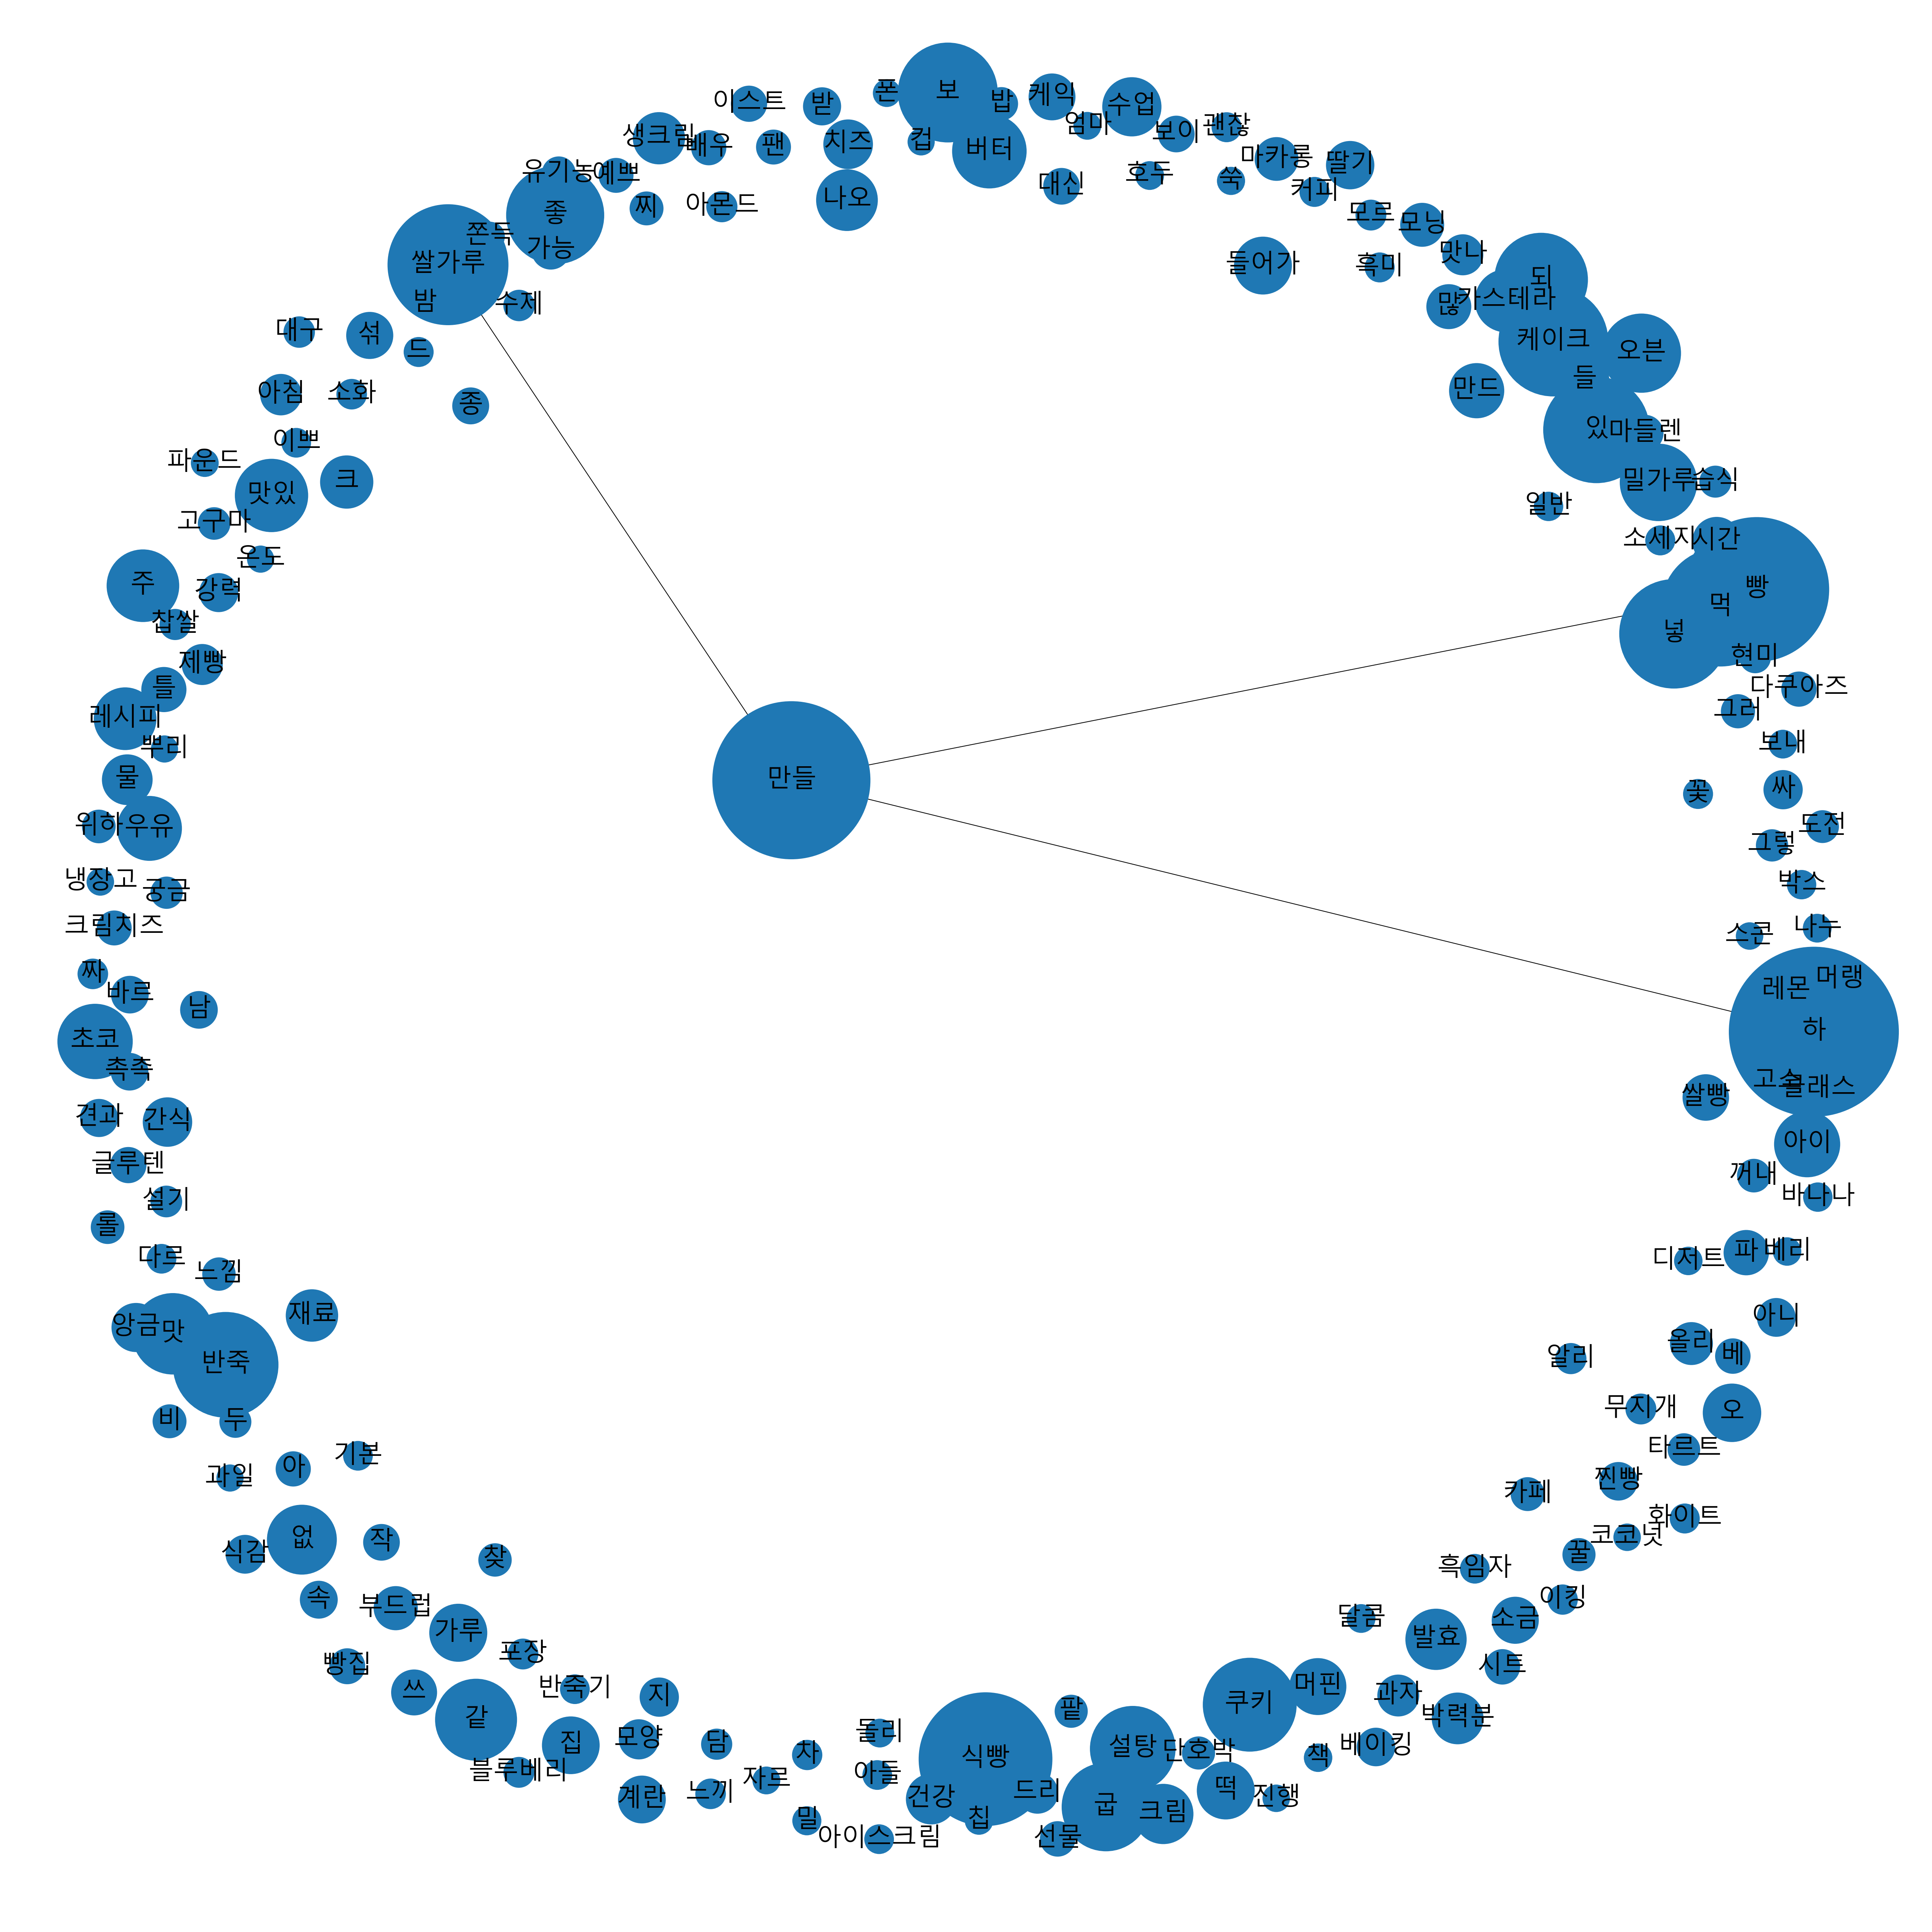

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(35,35))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])


# for node in G:
#     print(G.nodes[node])


# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*30 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

font_path = "data/Pretendard-Black.otf"
fname = fm.FontProperties(fname=font_path).get_name()

nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=33)



# # 그래프를 출력합니다.
ax = plt.gca()
plt.show()